<a href="https://colab.research.google.com/github/MayerT1/COLAB_DEV_GEDI-BDL/blob/main/Neon_tree_height_and_Lidar_CHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.neonscience.org/resources/learning-hub/tutorials/tree-heights-veg-structure-chm

R and Python Guide: https://www.neonscience.org/resources/learning-hub/tutorials/neondatastackr

Make sure this is set up Runtime-> Change Runtime Type -> Run Time Type -> R

In [1]:
install.packages("googledrive")
library("googledrive")

if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab_ipython.py")){
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. Setup

In [1]:
install.packages("neonUtilities")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("neonOS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("terra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
devtools::install_github("NEONScience/NEON-geolocation/geoNEON")

Skipping install of 'geoNEON' from a github remote, the SHA1 (59bdef7f) has not changed since last install.
  Use `force = TRUE` to force installation



In [46]:
install.packages("rlas")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Libraries

In [ ]:
library(rlas)

In [7]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
library(terra)

terra 1.8.21



In [9]:
library(neonUtilities)

In [10]:
library(neonOS)

In [11]:
library(geoNEON)

In [11]:
options(stringsAsFactors=F)

# set working directory

# adapt directory path for your system

# wd <- "~/data"

# setwd(wd)

In [12]:
wd <- "~/data"


In [13]:
getwd()

[1] "/content"

In [ ]:
#setwd(wd)

# 2. Vegetation structure data

[Cheatsheet](https://www.neonscience.org/sites/default/files/cheat-sheet-neonUtilities.pdf)

In [14]:
veglist <- loadByProduct(dpID="DP1.10098.001",
                         site="GUAN", #WREF
                         package="basic",
                         release="RELEASE-2023",
                         check.size = FALSE)

Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table vst_mappingandtagging
Stacking table vst_perplotperyear
Stacking table vst_shrubgroup
Stacking table vst_non-woody
Stacking table vst_apparentindividual
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 5 data tables and 4 metadata tables!
Stacking took 2.688707 secs


In [15]:
head(veglist)

name,pubCode,description,startDate,endDate
<chr>,<chr>,<chr>,<chr>,<chr>
Identification Qualifiers,cf. species,roughly equals but 'not sure' about the species,2012-01-01T00:00:00Z,
Identification Qualifiers,aff. species,similar to but is not the species,2012-01-01T00:00:00Z,
Identification Qualifiers,cf. genus,roughly equals but 'not sure' about the genus,2012-01-01T00:00:00Z,
Identification Qualifiers,aff. genus,similar to but is not the genus,2012-01-01T00:00:00Z,
Identification Qualifiers,cf. subspecies,roughly equals but 'not sure' about the subspecies,2012-01-01T00:00:00Z,
Identification Qualifiers,aff. subspecies,similar to but is not the subspecies,2012-01-01T00:00:00Z,
Identification Qualifiers,cf. family,roughly equals but 'not sure' about the family,2012-01-01T00:00:00Z,
Identification Qualifiers,aff. family,similar to but is not the family,2012-01-01T00:00:00Z,
Identification Qualifiers,cf. variety,roughly equals but 'not sure' about the variety,2012-01-01T00:00:00Z,


In [16]:
attributes(veglist)

$names
 [1] "categoricalCodes_10098"      "citation_10098_RELEASE-2023"
 [3] "issueLog_10098"              "readme_10098"               
 [5] "validation_10098"            "variables_10098"            
 [7] "vst_apparentindividual"      "vst_mappingandtagging"      
 [9] "vst_non-woody"               "vst_perplotperyear"         
[11] "vst_shrubgroup"

In [17]:
vegmap <- getLocTOS(veglist$vst_mappingandtagging,
                          "vst_mappingandtagging")

[1] "Please note locations will be calculated only for mapped woody individuals. To find subplot locations for unmapped individuals, use this function with the vst_apparentindividual, vst_non-woody, and/or vst_shrubgroup tables."
  |==================================================================    |  94%

The following namedLocation was not found: GUAN_013.basePlot.vst.40



  |===================================================================   |  96%

The following namedLocation was not found: GUAN_003.basePlot.vst.40



  |======================================================================| 100%


In [18]:
df <- vegmap
glimpse(df)
write.csv(df, file='vegmap.csv')

Rows: 7,357
Columns: 38
$ uid                        <chr> "02d00b0f-39d2-40c3-b02d-bf988d8100d3", "9a…
$ namedLocation              <chr> "GUAN_044.basePlot.vst", "GUAN_043.basePlot…
$ date                       <dttm> 2013-04-04, 2015-05-12, 2015-05-12, 2015-0…
$ eventID                    <chr> "vst_GUAN_2017", "vst_GUAN_2015", "vst_GUAN…
$ domainID                   <chr> "D04", "D04", "D04", "D04", "D04", "D04", "…
$ siteID                     <chr> "GUAN", "GUAN", "GUAN", "GUAN", "GUAN", "GU…
$ plotID                     <chr> "GUAN_044", "GUAN_043", "GUAN_043", "GUAN_0…
$ subplotID                  <chr> "39", "39", "39", "39", "39", "39", "39", "…
$ nestedSubplotID            <chr> NA, "1", "1", "1", "1", "1", "1", "1", "1",…
$ pointID                    <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ stemDistance               <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ stemAzimuth                <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ recordType    

In [19]:
head(vegmap)

,uid,namedLocation,date,eventID,domainID,siteID,plotID,subplotID,nestedSubplotID,pointID,⋯,publicationDate,release,utmZone,adjNorthing,adjEasting,adjCoordinateUncertainty,adjDecimalLatitude,adjDecimalLongitude,adjElevation,adjElevationUncertainty
,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1202,02d00b0f-39d2-40c3-b02d-bf988d8100d3,GUAN_044.basePlot.vst,2013-04-04,vst_GUAN_2017,D04,GUAN,GUAN_044,39,NA,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA
1203,9a9fe780-07e1-4067-9697-97ab3055f23a,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA
1204,cdc0b2d9-c155-4c0a-bf1d-89689e197456,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA
1205,6dea2800-66f0-49aa-8320-3a5efcd218e0,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA
1206,d35a6ed8-7941-46fe-a8ed-37a037a5bde2,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA
1207,bd5a5012-b5fe-43f6-94ed-4fad8accee29,GUAN_043.basePlot.vst,2015-05-12,vst_GUAN_2015,D04,GUAN,GUAN_043,39,1,NA,⋯,20230109T201450Z,RELEASE-2023,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
attributes(vegmap)

$names
 [1] "uid"                        "namedLocation"             
 [3] "date"                       "eventID"                   
 [5] "domainID"                   "siteID"                    
 [7] "plotID"                     "subplotID"                 
 [9] "nestedSubplotID"            "pointID"                   
[11] "stemDistance"               "stemAzimuth"               
[13] "recordType"                 "individualID"              
[15] "supportingStemIndividualID" "previouslyTaggedAs"        
[17] "samplingProtocolVersion"    "taxonID"                   
[19] "scientificName"             "taxonRank"                 
[21] "identificationReferences"   "morphospeciesID"           
[23] "morphospeciesIDRemarks"     "identificationQualifier"   
[25] "remarks"                    "measuredBy"                
[27] "recordedBy"                 "dataQF"                    
[29] "publicationDate"            "release"                   
[31] "utmZone"                    "adjNorthing"               
[33] "adjEasting"                 "adjCoordinateUncertainty"  
[35] "adjDecimalLatitude"         "adjDecimalLongitude"       
[37] "adjElevation"               "adjElevationUncertainty"   

$class
[1] "data.frame"

$row.names
   [1] 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215
  [15] 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225  349  338  351  348
  [29] 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239
  [43] 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253
  [57] 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267
  [71] 1268 1269 1270  385  347  363  414  352  357  350  353  360  411 1271
  [85] 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285
  [99] 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299
 [113] 1300  827  809 1301 1302 1303 1304 1305  828 1306 1307 1308  887  900
 [127]  913  883  911  908  885  884  886 1309 1310 1311 1312 1313 1314 1315
 [141] 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329
 [155] 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340  919  931  915
 [169]  949  924 1341 1342 1343  956  948  955  971  952 1344 1345 1346 1347
 [183] 1348 1349 1350 1050 1080 1035 1034 1351 1352 1353 1354 1355 1356 1357
 [197] 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1189 1368 1369 1370
 [211] 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384
 [225] 1385 1386 1196 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397
 [239] 1398 1399 1400 1401 1402 1403  667 1404 1405 1406 1407 1408 1409 1089
 [253] 1086 1054 1410 1096 1095 1411 1069 1053 1063  700 1412 1413 1414  681
 [267]  682 1415 1032 1416 1417 1418 1419 1021 1420 1421 1422 1423 1424 1425
 [281] 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 [295] 1440  557  560  561  558  584  576 1441  578  592  583  581 1442 1443
 [309] 1444 1445 1446  990 1447 1448 1449 1450 1011  733  741  735 1451  745
 [323] 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464  762
 [337] 1465  769  753 1466 1467 1468 1469 1470  790 1471 1472 1473   21 1474
 [351]   20 1475 1476 1477   24 1478   23 1479 1480 1481 1482   13 1483   12
 [365]   17 1484 1485   16 1486 1487 1488   19   22   15 1489 1490 1491 1492
 [379] 1493 1494 1495 1496 1497 1498 1499   26 1500   25 1501 1502 1503 1504
 [393] 1505   18 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517
 [407] 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531
 [421] 1532 1533 1534 1535 1536 1537 1538 1539 1540   28 1541 1542 1543 1544
 [435] 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557   11
 [449] 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571
 [463] 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585
 [477] 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598  261
 [491] 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 16

In [21]:
veg <- joinTableNEON(veglist$vst_apparentindividual,
                     vegmap,
                     name1="vst_apparentindividual",
                     name2="vst_mappingandtagging")

In [22]:
head(veg)

,individualID,domainID,siteID,plotID,namedLocation,uid.x,date.x,eventID.x,subplotID,nestedSubplotID,⋯,dendrometerGap,dendrometerCondition,bandStemDiameter,remarks.y,recordedBy.y,measuredBy.y,dataEntryRecordID,dataQF.y,publicationDate.y,release.y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,NA,amegill@battelleecology.org,wplaza-muniz@battelleecology.org,NA,legacyData,20230109T200953Z,RELEASE-2023
2,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,NA,amegill@battelleecology.org,wplaza-muniz@battelleecology.org,NA,legacyData,20230109T200953Z,RELEASE-2023
3,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,Individual not measure at 10 cm,mresto@field-ops.org,lrivera@field-ops.org,NA,legacyData,20230109T192755Z,RELEASE-2023
4,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,NA,0000-0001-8629-4086,0000-0002-9129-5419,59293cff-4efc-45e5-80cc-2243785994a9,NA,20230109T192429Z,RELEASE-2023
5,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,Only one stem qualify,amegill@battelleecology.org,wplaza-muniz@battelleecology.org,NA,NA,20230109T190804Z,RELEASE-2023
6,NEON.PLA.D04.GUAN.00001,D04,GUAN,GUAN_043,GUAN_043.basePlot.vst,7813d600-1e6a-436e-bdf4-5abc8ae2b4ad,2016-06-21,vst_GUAN_2016,39,1,⋯,NA,NA,NA,NA,ajimenez@battelleecology.org,tvelazquez-rojas@battelleecology.org,NA,legacyData,20230109T190955Z,RELEASE-2023


In [23]:
attributes(veg)

$names
 [1] "individualID"                  "domainID"                     
 [3] "siteID"                        "plotID"                       
 [5] "namedLocation"                 "uid.x"                        
 [7] "date.x"                        "eventID.x"                    
 [9] "subplotID"                     "nestedSubplotID"              
[11] "pointID"                       "stemDistance"                 
[13] "stemAzimuth"                   "recordType"                   
[15] "supportingStemIndividualID"    "previouslyTaggedAs"           
[17] "samplingProtocolVersion"       "taxonID"                      
[19] "scientificName"                "taxonRank"                    
[21] "identificationReferences"      "morphospeciesID"              
[23] "morphospeciesIDRemarks"        "identificationQualifier"      
[25] "remarks.x"                     "measuredBy.x"                 
[27] "recordedBy.x"                  "dataQF.x"                     
[29] "publicationDate.x"             "release.x"                    
[31] "utmZone"                       "adjNorthing"                  
[33] "adjEasting"                    "adjCoordinateUncertainty"     
[35] "adjDecimalLatitude"            "adjDecimalLongitude"          
[37] "adjElevation"                  "adjElevationUncertainty"      
[39] "uid.y"                         "date.y"                       
[41] "eventID.y"                     "tempStemID"                   
[43] "tagStatus"                     "growthForm"                   
[45] "plantStatus"                   "stemDiameter"                 
[47] "measurementHeight"             "changedMeasurementLocation"   
[49] "height"                        "baseCrownHeight"              
[51] "breakHeight"                   "breakDiameter"                
[53] "maxCrownDiameter"              "ninetyCrownDiameter"          
[55] "canopyPosition"                "shape"                        
[57] "basalStemDiameter"             "basalStemDiameterMsrmntHeight"
[59] "maxBaseCrownDiameter"          "ninetyBaseCrownDiameter"      
[61] "dendrometerInstallationDate"   "initialGapMeasurementDate"    
[63] "initialBandStemDiameter"       "initialDendrometerGap"        
[65] "dendrometerHeight"             "dendrometerGap"               
[67] "dendrometerCondition"          "bandStemDiameter"             
[69] "remarks.y"                     "recordedBy.y"                 
[71] "measuredBy.y"                  "dataEntryRecordID"            
[73] "dataQF.y"                      "publicationDate.y"            
[75] "release.y"                    

$row.names
    [1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208

In [32]:
df <- veg
glimpse(df)
write.csv(df, file='veg.csv')

Rows: 17,540
Columns: 75
$ individualID                  <chr> "NEON.PLA.D04.GUAN.00001", "NEON.PLA.D04…
$ domainID                      <chr> "D04", "D04", "D04", "D04", "D04", "D04"…
$ siteID                        <chr> "GUAN", "GUAN", "GUAN", "GUAN", "GUAN", …
$ plotID                        <chr> "GUAN_043", "GUAN_043", "GUAN_043", "GUA…
$ namedLocation                 <chr> "GUAN_043.basePlot.vst", "GUAN_043.baseP…
$ uid.x                         <chr> "7813d600-1e6a-436e-bdf4-5abc8ae2b4ad", …
$ date.x                        <dttm> 2016-06-21, 2016-06-21, 2016-06-21, 201…
$ eventID.x                     <chr> "vst_GUAN_2016", "vst_GUAN_2016", "vst_G…
$ subplotID                     <chr> "39", "39", "39", "39", "39", "39", "39"…
$ nestedSubplotID               <chr> "1", "1", "1", "1", "1", "1", "1", "1", …
$ pointID                       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ stemDistance                  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ stemAzimuth  

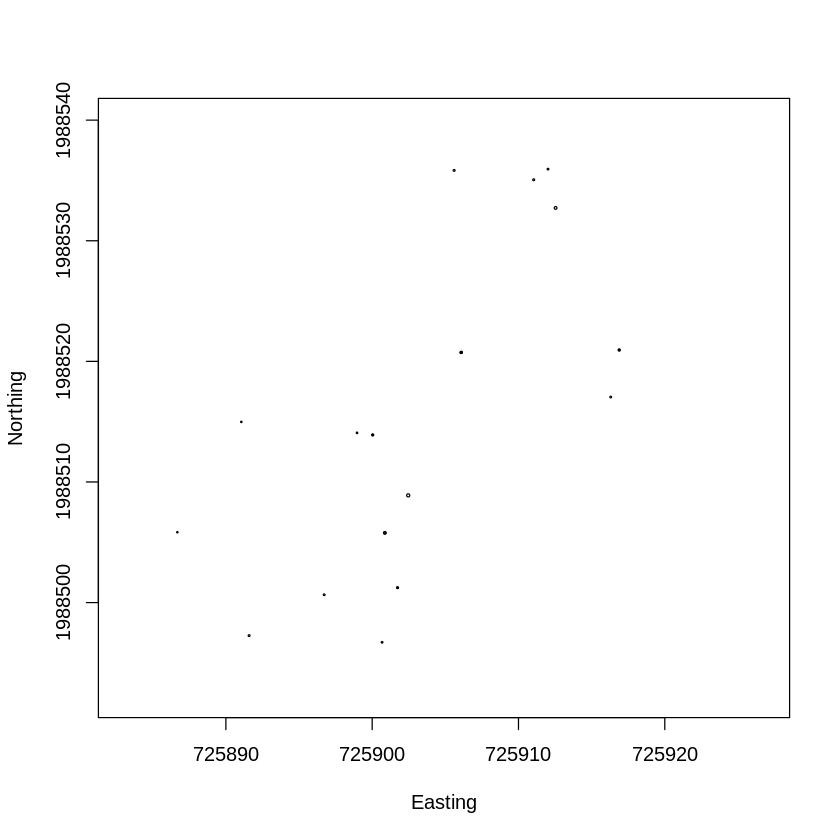

In [29]:
#WREF_075

symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$stemDiameter[which(veg$plotID=="GUAN_047")]/100/2,
        inches=F, xlab="Easting", ylab="Northing")

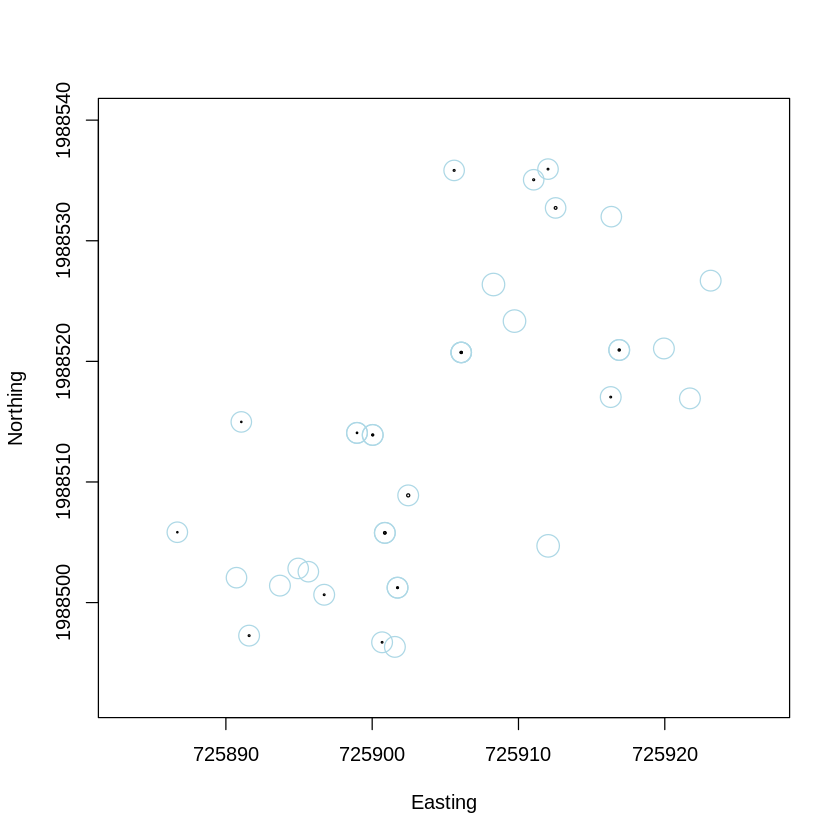

In [31]:
symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$stemDiameter[which(veg$plotID=="GUAN_047")]/100/2,
        inches=F, xlab="Easting", ylab="Northing")

symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$adjCoordinateUncertainty[which(veg$plotID=="GUAN_047")],
        inches=F, add=T, fg="lightblue")

# Canopy height model data

In [ ]:
# byTileAOP(dpID="DP3.30015.001", site="WREF", year="2017",
#           easting=veg$adjEasting[which(veg$plotID=="WREF_075")],
#           northing=veg$adjNorthing[which(veg$plotID=="WREF_075")],
#           check.size=FALSE, savepath=wd)


#chm <- rast(paste0(wd, "/DP3.30015.001/neon-aop-products/2017/FullSite/D16/2017_WREF_1/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D16_WREF_DP3_580000_5075000_CHM.tif"))

In [39]:

# # use os.path.join to get the full path of the laz file
# laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
# # read the laz file into a LasData object using laspy.read()
# point_cloud=laspy.read(laz_data_file)



laz = byTileAOP(dpID="DP1.30003.001", site="GUAN", year="2018",
          easting=veg$adjEasting[which(veg$plotID=="GUAN_047")],
          northing=veg$adjNorthing[which(veg$plotID=="GUAN_047")],
          check.size=FALSE)#, savepath=wd)


# chm <- rast(paste0(wd, "/DP1.30003.001/neon-aop-products/2018/FullSite/D16/2017_WREF_1/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D16_WREF_DP3_580000_5075000_CHM.tif"))


  |======================================================================| 100%
Successfully downloaded 6 files to /content/DP1.30003.001


In [53]:

# Define the path to the laz file
laz_path <- "/content/DP1.30003.001/neon-aop-products/2018/FullSite/D04/2018_GUAN_1/L1/DiscreteLidar/ClassifiedPointCloud"

# List files in the directory to check for the file name
print(list.files(laz_path))

# Update the file name using the correct name from the output of list.files()
laz_data_file <- file.path(laz_path, "NEON_D04_GUAN_DP1_725000_1988000_classified_point_cloud_colorized.laz")  # replace with the correct name
# or use list.files to find the correct file

# check to see if the file exists using file.exists()
if (file.exists(laz_data_file)) {
  # Read the laz file
  point_cloud <- read.las(laz_data_file)

  # Print summary of the point cloud data
  print(point_cloud)
} else {
  print(paste("Error: File not found at", laz_data_file))
}

[1] "NEON_D04_GUAN_DP1_725000_1988000_classified_point_cloud_colorized.laz"
                X       Y      Z  gpstime Intensity ReturnNumber
            <num>   <num>  <num>    <num>     <int>        <int>
      1: 725938.2 1988000 109.33 396916.6         3            2
      2: 725942.2 1988000 110.80 396916.6         3            2
      3: 725942.0 1988000 111.17 396916.6         5            2
      4: 725941.9 1988000 111.55 396916.6         5            2
      5: 725941.6 1988000 111.39 396916.6         9            2
     ---                                                        
7035970: 725132.3 1988120 288.01 398204.3         5            1
7035971: 725202.8 1988102 184.27 398205.0         2            1
7035972: 725202.7 1988102 184.16 398205.0         1            1
7035973: 725162.6 1988059 216.57 398205.6         1            1
7035974: 725162.5 1988058 216.61 398205.6         1            1
         NumberOfReturns ScanDirectionFlag EdgeOfFlightline Classification
    

In [ ]:
# plot(chm, col=topo.colors(5))

# plot(point_cloud, col=topo.colors(5))

# 4. Comparing the two datasets

In [ ]:
vegsub <- veg[which(veg$adjEasting >= ext(chm)[1] &
                      veg$adjEasting <= ext(chm)[2] &
                      veg$adjNorthing >= ext(chm)[3] &
                      veg$adjNorthing <= ext(chm)[4]),]

In [ ]:
valCHM <- extract(chm,
                  cbind(vegsub$adjEasting,
                  vegsub$adjNorthing))



plot(valCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegsub$height, pch=20, xlab="Height",
     ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(valCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegsub$height, use="complete")

## [1] 0.3824467

In [ ]:
valCHMbuff <- extract(chm,
                  buffer(vect(cbind(vegsub$adjEasting,
                  vegsub$adjNorthing)),
                  width=vegsub$adjCoordinateUncertainty),
                  fun=max)



plot(valCHMbuff$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegsub$height, pch=20, xlab="Height",
     ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(valCHMbuff$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegsub$height, use="complete")

## [1] 0.3698753

map-centric approach

In [ ]:
easting10 <- 10*floor(vegsub$adjEasting/10)

northing10 <- 10*floor(vegsub$adjNorthing/10)

vegsub <- cbind(vegsub, easting10, northing10)

In [ ]:
attributes(vegsub)

In [ ]:
vegbin <- stats::aggregate(vegsub,
                           by=list(vegsub$easting10,
                                   vegsub$northing10),
                           FUN=max)

In [ ]:
CHM10 <- terra::aggregate(chm, fact=10, fun=max)

plot(CHM10, col=topo.colors(5))

In [ ]:
vegbin$easting10 <- vegbin$easting10 + 5

vegbin$northing10 <- vegbin$northing10 + 5

binCHM <- extract(CHM10, cbind(vegbin$easting10,
                               vegbin$northing10))

plot(binCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegbin$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(binCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegbin$height, use="complete")

## [1] 0.2244228

tree-centric approach

In [ ]:
vegsub <- vegsub[order(vegsub$height,
                       decreasing=T),]

In [ ]:
vegfil <- vegsub

for(i in 1:nrow(vegsub)) {
    if(is.na(vegfil$height[i]))
        next
    dist <- sqrt((vegsub$adjEasting[i]-vegsub$adjEasting)^2 +
                (vegsub$adjNorthing[i]-vegsub$adjNorthing)^2)
    vegfil$height[which(dist<0.3*vegsub$height[i] &
                        vegsub$height<vegsub$height[i])] <- NA
}



vegfil <- vegfil[which(!is.na(vegfil$height)),]

In [ ]:
filterCHM <- extract(chm,
                     cbind(vegfil$adjEasting,
                           vegfil$adjNorthing))

plot(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegfil$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegfil$height)

## [1] 0.8070586

In [ ]:
vegfil <- vegfil[which(vegfil$plantStatus=="Live"),]

filterCHM <- extract(chm,
                     cbind(vegfil$adjEasting,
                           vegfil$adjNorthing))

plot(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegfil$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegfil$height)

## [1] 0.9057883